In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
import re
from shutil import copyfile
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
dall_scores = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('*_input_*/score.sc')], ignore_index = True)
print(dall_scores)

      SCORE:  total_score  angle_constraint  atom_pair_constraint  \
0     SCORE:     -722.257               0.0                   0.0   
1     SCORE:     -721.940               0.0                   0.0   
2     SCORE:     -723.210               0.0                   0.0   
3     SCORE:     -723.249               0.0                   0.0   
4     SCORE:     -722.979               0.0                   0.0   
...      ...          ...               ...                   ...   
1305  SCORE:     -737.467               0.0                   0.0   
1306  SCORE:     -735.720               0.0                   0.0   
1307  SCORE:     -735.714               0.0                   0.0   
1308  SCORE:     -735.299               0.0                   0.0   
1309  SCORE:     -735.433               0.0                   0.0   

      dihedral_constraint  dslf_fa13   fa_atr   fa_dun  fa_elec  fa_intra_rep  \
0                   1.198        0.0 -926.413  197.308 -436.363         1.841   
1        

In [3]:
dscore_per_design = pd.DataFrame()
dscore_per_design = dscore_per_design.append([pd.read_csv(f, sep='\s+', header=1).mean() for f in glob.glob('*_input_*/score.sc')], ignore_index = True)
print(dscore_per_design)


     total_score  angle_constraint  atom_pair_constraint  dihedral_constraint  \
0      -722.5685               0.0                   0.0               1.3907   
1      -723.7586               0.0                   0.0               0.9457   
2      -737.1485               0.0                   0.0               0.6501   
3      -725.1758               0.0                   0.0               0.8287   
4      -753.5745               0.0                   0.0               1.4695   
..           ...               ...                   ...                  ...   
126    -729.2242               0.0                   0.0               1.2622   
127    -725.5734               0.0                   0.0               1.0167   
128    -735.8004               0.0                   0.0               1.1764   
129    -732.1403               0.0                   0.0               1.1209   
130    -735.4476               0.0                   0.0               0.9535   

     dslf_fa13    fa_atr   

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


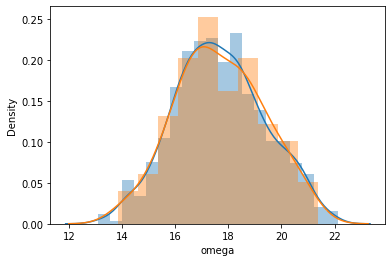

In [4]:
sns.distplot(dall_scores["omega"], bins=20)
sns.distplot(dscore_per_design["omega"], bins=10)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


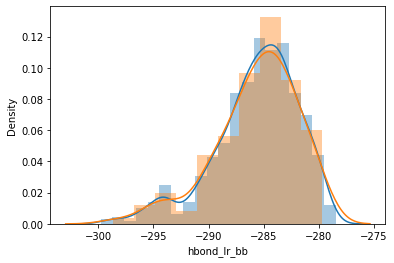

In [5]:
sns.distplot(dall_scores["hbond_lr_bb"], bins=20)
sns.distplot(dscore_per_design["hbond_lr_bb"], bins=10)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


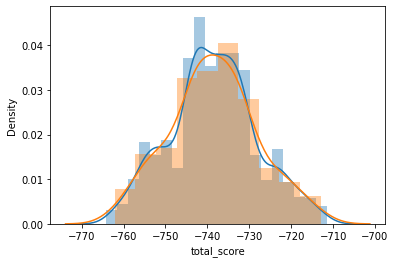

In [6]:
sns.distplot(dall_scores["total_score"], bins=20)
sns.distplot(dscore_per_design["total_score"], bins=10)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


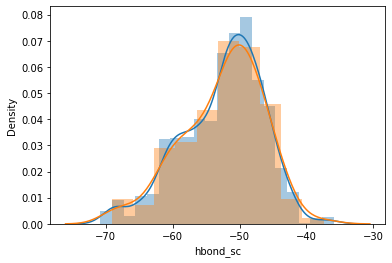

In [7]:
sns.distplot(dall_scores["hbond_sc"], bins=20)
sns.distplot(dscore_per_design["hbond_sc"], bins=10)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


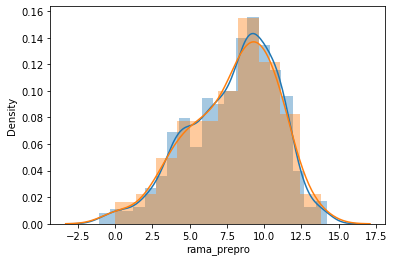

In [8]:
sns.distplot(dall_scores["rama_prepro"], bins=20)
sns.distplot(dscore_per_design["rama_prepro"], bins=10)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


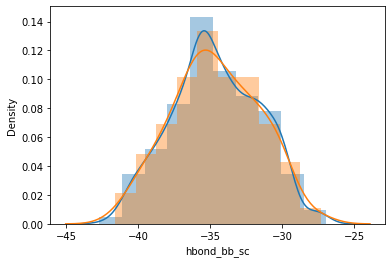

In [9]:
sns.distplot(dall_scores["hbond_bb_sc"], bins=10)
sns.distplot(dscore_per_design["hbond_bb_sc"], bins=10)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


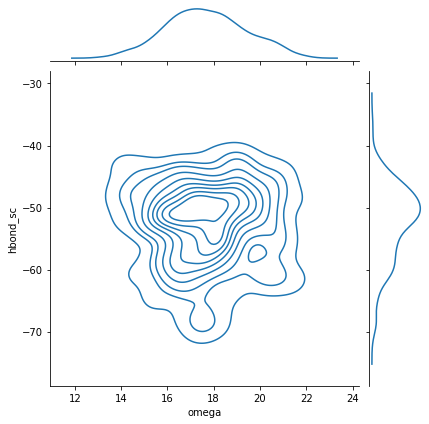

In [10]:
sns.jointplot("omega", "hbond_sc", dall_scores, kind='kde')

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


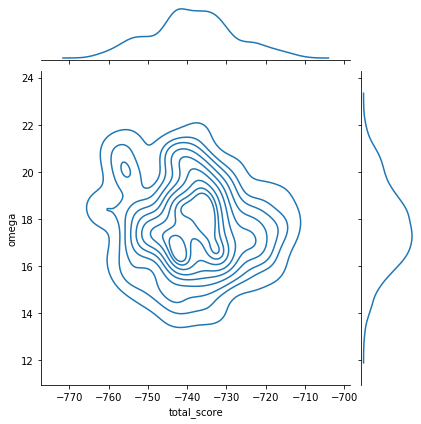

In [11]:
sns.jointplot("total_score", "omega", dall_scores, kind='kde')

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


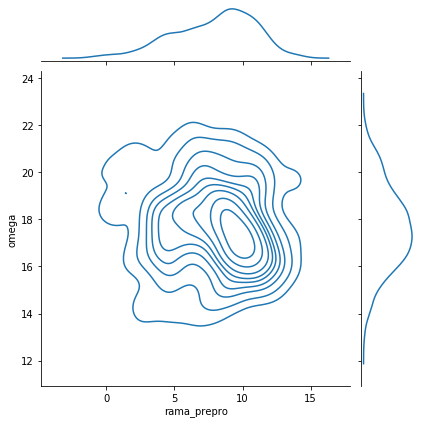

In [12]:
sns.jointplot("rama_prepro", "omega", dall_scores, kind='kde')

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


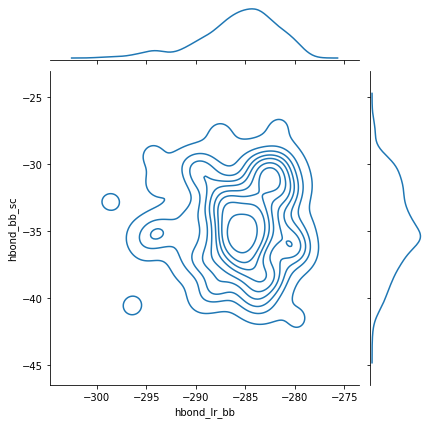

In [13]:
sns.jointplot("hbond_lr_bb", "hbond_bb_sc", dall_scores, kind='kde')

In [14]:
dall_scores["design"] = dall_scores.description.apply(lambda x: "_".join(x.split("_")[:-1]))
dall_scores.groupby(['design'], sort=False)['total_score'].max()

design
38_input_0043_0005_00019_0002_0005_0005   -721.490
9_input_0062_0002_00013_0003_0008_0001    -722.077
32_input_0135_0003_0006_0005_0001_0006    -735.685
28_input_0086_0005_0007_0004_0004_0006    -723.858
29_input_0012_0003_0008_0002_0010_0005    -752.512
                                            ...   
4_input_0037_0002_0004_0005_0005_0007     -728.088
44_input_0055_0004_00010_0003_0006_0005   -723.695
20_input_0142_0004_00013_0005_0010_0007   -734.047
28_input_0086_0005_0007_0003_0003_0008    -730.917
11_input_0180_0001_00017_0005_0002_0005   -733.809
Name: total_score, Length: 131, dtype: float64

In [15]:
idx = dall_scores.groupby(['design'])['total_score'].transform(max) == dall_scores['total_score']

dpicked = dall_scores[idx]
print(dpicked)

      SCORE:  total_score  angle_constraint  atom_pair_constraint  \
9     SCORE:     -721.490               0.0                   0.0   
16    SCORE:     -722.077               0.0                   0.0   
28    SCORE:     -735.685               0.0                   0.0   
34    SCORE:     -723.858               0.0                   0.0   
45    SCORE:     -752.512               0.0                   0.0   
...      ...          ...               ...                   ...   
1266  SCORE:     -728.088               0.0                   0.0   
1276  SCORE:     -723.695               0.0                   0.0   
1283  SCORE:     -734.047               0.0                   0.0   
1298  SCORE:     -730.917               0.0                   0.0   
1303  SCORE:     -733.809               0.0                   0.0   

      dihedral_constraint  dslf_fa13   fa_atr   fa_dun  fa_elec  fa_intra_rep  \
9                   1.241        0.0 -924.182  195.311 -436.529         1.782   
16       

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


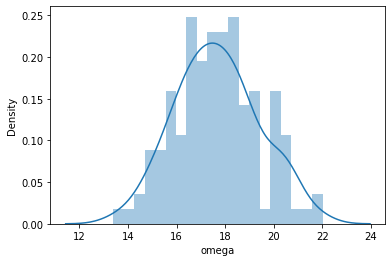

In [22]:
sns.distplot(dpicked["omega"], bins=20)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


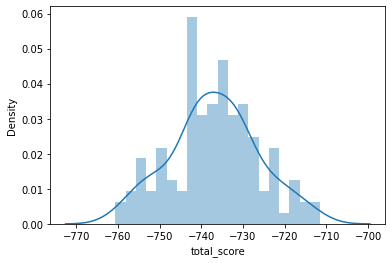

In [23]:
sns.distplot(dpicked["total_score"], bins=20)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


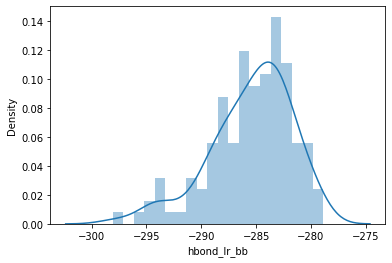

In [24]:
sns.distplot(dpicked["hbond_lr_bb"], bins=20)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


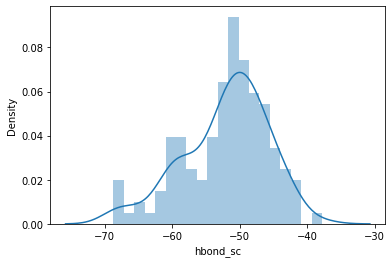

In [26]:
sns.distplot(dpicked["hbond_sc"], bins=20)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


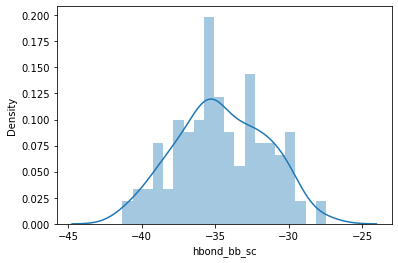

In [27]:
sns.distplot(dpicked["hbond_bb_sc"], bins=20)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


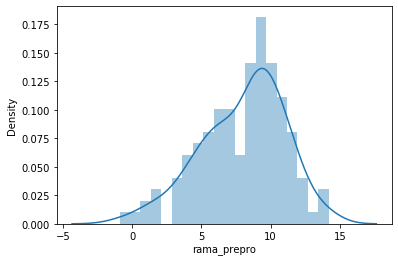

In [28]:
sns.distplot(dpicked["rama_prepro"], bins=20)

In [29]:
from shutil import copyfile

for index,row in dpicked.iterrows():
    pdb = row["description"] + ".pdb"
    source = row["design"] + "/" + pdb
    target = "best/" + pdb
    copyfile(source, target)

In [51]:
from shutil import copyfile

for index,row in dselected.iterrows():
    pdb = row["description"] + ".pdb"
    source = "round4/best_hbond/unique/" + row["design"] + "/" + pdb
    target = "round4/best_hbond/unique/selected/" + pdb
    copyfile(source, target)

In [6]:
with open("round4/best_hbond/all_picked/designs.fasta","r") as fasta_file:
    for line in fasta_file:
        if line[0] == ">":
            pdb = line[1:].strip()
            pdb_name = os.path.splitext(pdb)[0]
            sequence = next(fasta_file).strip()
            resfile = "round4/best_hbond/all_picked/" + pdb_name + "/all.resfile"
            with open("round4/best_hbond/all_picked/all.resfile") as resfile_in:
                with open(resfile, 'w') as resfile_out:
                    for line in resfile_in:
                        try:
                            pos = int(line.split(" ")[0])
                            if sequence[pos-1] == "G":
                                resfile_out.write("# " + line)
                            else:
                                resfile_out.write(line)
                        except:
                            resfile_out.write(line)